## Importing Libraries

In [1]:
import pandas as pd
import numpy as np

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

In [3]:
from sklearn.model_selection import train_test_split

In [4]:
import keras
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense, Conv1D, Flatten, MaxPooling1D, Dropout, Activation
from keras.layers import TimeDistributed
from sklearn.ensemble import StackingClassifier

from tensorflow import keras
from keras import optimizers

In [5]:
import matplotlib.pyplot as plt

In [6]:
from sklearn.metrics import classification_report
from sklearn import metrics

In [7]:
from numpy import dstack
from sklearn.linear_model import LogisticRegression

## Reading Dataset

In [8]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [9]:
# Reading "csv" Dataset
Dataset = pd.read_csv("/content/drive/MyDrive/Project/DataSet/Features_Combined.csv")

In [10]:
Dataset.head()

,0,1,2,3,4,5,6,7,8,9,...,139,140,141,142,143,144,145,146,147,labels
0,0.000056,0.000195,0.000281,0.000119,0.000119,0.003826,0.215466,0.779309,1.186640,0.456590,...,-11.354362,-7.726419,1.593689,-9.145521,-0.212657,-6.929526,-4.322876,-4.710403,-8.351056,calm
1,0.000203,0.000322,0.000439,0.000271,0.000265,0.003977,0.215628,0.776650,1.184454,0.458336,...,-10.847643,-6.654379,-1.465691,-6.797494,-3.094689,-6.291496,-4.512487,-4.711416,-8.531783,calm
2,0.000012,0.000048,0.000069,0.000038,0.000026,0.000213,0.008568,0.090721,0.256162,0.167146,...,-13.176809,-3.879907,-0.284960,-9.416859,0.278055,-8.788507,-4.630785,-7.198601,-8.594221,calm
3,0.000052,0.000118,0.000180,0.000401,0.000892,0.033079,0.149234,0.258785,0.233824,0.028744,...,-3.513651,-0.170925,-5.336728,1.003468,-3.568468,-5.821103,-3.620392,-4.771007,-3.185519,sad
4,0.000480,0.000538,0.000612,0.000840,0.001356,0.033393,0.147666,0.261492,0.236123,0.028882,...,-3.040922,-2.138857,-3.132770,-1.381131,-2.552100,-4.274347,-2.680576,-4.152612,-3.639899,sad


## Replacing Emotions to Values



In [11]:
Dataset = Dataset.replace("calm", 0)
Dataset = Dataset.replace("sad", 1)
Dataset = Dataset.replace("happy", 2)
Dataset = Dataset.replace("neutral", 3)
Dataset = Dataset.replace("angry", 4)
Dataset = Dataset.replace("disgust", 5)
Dataset = Dataset.replace("fear", 6)
Dataset = Dataset.replace("surprise", 7)

## Changing pandas dataframe to numpy array

In [12]:
X = Dataset.iloc[:,:148].values
Y = Dataset.iloc[:,148:].values

In [13]:
# Features

X

array([[ 5.60705848e-05,  1.94506836e-04,  2.81415560e-04, ...,
        -4.32287645e+00, -4.71040344e+00, -8.35105610e+00],
       [ 2.02672456e-04,  3.21870594e-04,  4.39332463e-04, ...,
        -4.51248750e+00, -4.71141584e+00, -8.53178279e+00],
       [ 1.21692983e-05,  4.75329180e-05,  6.92600006e-05, ...,
        -4.63078547e+00, -7.19860077e+00, -8.59422112e+00],
       ...,
       [ 4.63894321e-05,  3.03594774e-04,  1.18483054e-02, ...,
         4.53363991e+00, -5.57978153e+00,  6.27505407e-02],
       [ 6.50331236e-05,  3.16206871e-04,  1.18802942e-02, ...,
         4.18286107e+00, -4.87670749e+00, -3.55554137e-01],
       [ 6.54187716e-06,  3.34603828e-05,  1.99942710e-03, ...,
         2.40215874e+00, -7.08759308e+00, -4.80714273e+00]])

In [14]:
# Labels

Y

array([[0],
       [0],
       [0],
       ...,
       [3],
       [3],
       [3]])

## Normalizing the data


In [15]:
sc = StandardScaler()
X = sc.fit_transform(X)

In [16]:
X

array([[-0.1164991 , -0.10500371, -0.25439544, ..., -0.67023061,
        -0.35519796, -1.49860173],
       [-0.11634414, -0.10198271, -0.24022092, ..., -0.7150842 ,
        -0.3554285 , -1.53760257],
       [-0.1165455 , -0.10848986, -0.27343838, ..., -0.74306827,
        -0.92180967, -1.55107677],
       ...,
       [-0.11650933, -0.1024162 ,  0.78384069, ...,  1.42482956,
        -0.55317253,  0.31709879],
       [-0.11648962, -0.10211705,  0.78671198, ...,  1.34185079,
        -0.39306868,  0.22682859],
       [-0.11655145, -0.10882365, -0.1001879 , ...,  0.92061536,
        -0.89653102, -0.73382479]])

## One-Hot Encoding

In [17]:
ohe = OneHotEncoder()
Y = ohe.fit_transform(Y).toarray()

In [18]:
Y

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

## Train-Test Split

In [19]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size = 0.2)

## Reshaping the data

In [20]:
x_train = x_train.reshape(x_train.shape[0],37,4)
x_test = x_test.reshape(x_test.shape[0],37,4)

# Building the Neural Network

## CNN

In [21]:
model = Sequential()
model.add(Conv1D(256, 5,padding='same', input_shape=(37,4))) #1
model.add(Activation('relu'))
model.add(Conv1D(128, 5,padding='same')) #2
model.add(Activation('relu'))
model.add(Dropout(0.1))
model.add(MaxPooling1D(pool_size=3))
model.add(Conv1D(128, 5,padding='same')) #3
model.add(Activation('relu'))
model.add(Conv1D(128, 5,padding='same')) #4
model.add(Activation('relu'))
model.add(Conv1D(128, 5,padding='same')) #5
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Conv1D(128, 5,padding='same')) #6
model.add(Activation('relu'))
model.add(Flatten())
model.add(Dense(8)) #7
model.add(Activation('softmax'))
#optimizer = keras.optimizers.RMSprop(learning_rate = 0.00001, decay = 1e-6)

In [22]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [23]:
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs = 50)
y_pred_cnn = model.predict(x_test)

Epoch 1/50
116/116 [==============================] - 14s 97ms/step - loss: 1.8875 - accuracy: 0.2474 - val_loss: 1.8210 - val_accuracy: 0.2364
Epoch 2/50
116/116 [==============================] - 9s 74ms/step - loss: 1.6662 - accuracy: 0.3380 - val_loss: 1.5916 - val_accuracy: 0.3829
Epoch 3/50
116/116 [==============================] - 9s 74ms/step - loss: 1.4587 - accuracy: 0.4224 - val_loss: 1.2916 - val_accuracy: 0.5022
Epoch 4/50
116/116 [==============================] - 9s 75ms/step - loss: 1.2460 - accuracy: 0.5288 - val_loss: 1.1784 - val_accuracy: 0.5510
Epoch 5/50
116/116 [==============================] - 9s 74ms/step - loss: 1.0780 - accuracy: 0.5890 - val_loss: 1.0638 - val_accuracy: 0.5900
Epoch 6/50
116/116 [==============================] - 9s 75ms/step - loss: 0.9603 - accuracy: 0.6519 - val_loss: 0.9645 - val_accuracy: 0.6356
Epoch 7/50
116/116 [==============================] - 9s 74ms/step - loss: 0.7953 - accuracy: 0.7073 - val_loss: 1.0050 - val_accuracy: 0.685

## LSTM

## Train-Test Split

In [24]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size = 0.2)

## Reshaping the Data

In [25]:
x_train = x_train.reshape(x_train.shape[0],1,148)
x_test = x_test.reshape(x_test.shape[0],1,148)

In [26]:
model_lstm = Sequential()
model_lstm.add(LSTM(256, input_shape=(1, 148)))
model_lstm.add(Dense(8, activation='softmax'))

In [27]:
model_lstm.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [28]:
history_model_lstm = model_lstm.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=50)
y_pred_lstm = model_lstm.predict(x_test)

Epoch 1/50
116/116 [==============================] - 5s 18ms/step - loss: 1.7998 - accuracy: 0.3166 - val_loss: 1.6511 - val_accuracy: 0.3926
Epoch 2/50
116/116 [==============================] - 1s 9ms/step - loss: 1.5518 - accuracy: 0.4251 - val_loss: 1.5106 - val_accuracy: 0.4208
Epoch 3/50
116/116 [==============================] - 1s 10ms/step - loss: 1.4128 - accuracy: 0.4737 - val_loss: 1.4008 - val_accuracy: 0.4805
Epoch 4/50
116/116 [==============================] - 1s 10ms/step - loss: 1.3210 - accuracy: 0.5128 - val_loss: 1.3370 - val_accuracy: 0.5000
Epoch 5/50
116/116 [==============================] - 1s 9ms/step - loss: 1.2370 - accuracy: 0.5407 - val_loss: 1.2922 - val_accuracy: 0.5228
Epoch 6/50
116/116 [==============================] - 1s 9ms/step - loss: 1.1830 - accuracy: 0.5613 - val_loss: 1.2498 - val_accuracy: 0.5228
Epoch 7/50
116/116 [==============================] - 1s 10ms/step - loss: 1.1191 - accuracy: 0.5933 - val_loss: 1.2268 - val_accuracy: 0.5369
Ep

## ANN


In [29]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size = 0.2)

In [30]:
model_ann = Sequential()

model_ann.add(Dense(300, input_dim = 148, activation ='relu'))

model_ann.add(Dense(200, activation='relu'))

model_ann.add(Dropout(0.2))

model_ann.add(Dense(150, activation='relu'))

model_ann.add(Dropout(0.2))

model_ann.add(Dense(100, activation='relu'))

model_ann.add(Dense(50, activation='relu'))

model_ann.add(Dense(8, activation='softmax'))

In [31]:
model_ann.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [32]:
history_model_ann = model_ann.fit(x_train, y_train, validation_data = (x_test,y_test), epochs=50, batch_size=64)
y_pred_ann = model_ann.predict(x_test)

Epoch 1/50
58/58 [==============================] - 1s 10ms/step - loss: 1.8866 - accuracy: 0.2390 - val_loss: 1.7356 - val_accuracy: 0.3427
Epoch 2/50
58/58 [==============================] - 0s 7ms/step - loss: 1.6415 - accuracy: 0.3616 - val_loss: 1.4966 - val_accuracy: 0.4425
Epoch 3/50
58/58 [==============================] - 0s 7ms/step - loss: 1.4554 - accuracy: 0.4428 - val_loss: 1.3518 - val_accuracy: 0.4967
Epoch 4/50
58/58 [==============================] - 0s 8ms/step - loss: 1.2590 - accuracy: 0.5250 - val_loss: 1.2832 - val_accuracy: 0.5141
Epoch 5/50
58/58 [==============================] - 0s 7ms/step - loss: 1.1408 - accuracy: 0.5846 - val_loss: 1.1934 - val_accuracy: 0.5694
Epoch 6/50
58/58 [==============================] - 0s 7ms/step - loss: 1.0558 - accuracy: 0.6172 - val_loss: 1.1027 - val_accuracy: 0.5738
Epoch 7/50
58/58 [==============================] - 0s 7ms/step - loss: 0.9144 - accuracy: 0.6630 - val_loss: 1.0631 - val_accuracy: 0.5976
Epoch 8/50
58/58 [=

In [33]:
model_ann.input_shape

(None, 148)

In [34]:
members = []
members.append(model)
members.append(model_lstm)
members.append(model_ann)

In [35]:
members_name = []
members_name.append('model_cnn')
members_name.append('model_lstm')
members_name.append('model_ann')

In [36]:
model.input_shape

(None, 37, 4)

In [37]:
def stacked_dataset_weighted(members, inputX): 
# stackX = None 
  count = 1
  results = pd.DataFrame()
  for memb in members: 
    #print(members_name[count-1])
    name = members_name[count-1]
    if count == 1:
      input = inputX.reshape(inputX.shape[0],37,4)
      count+=1
    elif count == 2:
      input = inputX.reshape(inputX.shape[0],1,148)
      count+=1
    else:
      input = inputX
    yhat = memb.predict(input, verbose=0) 
    #print(yhat)
    #print('done')
    test = []
    for i in range(len(yhat)):
      test.append(np.argmax(yhat[i]))
    #print(test)
    results[name] = test
    #print(test)
  #votes = pd.concat(results, axis='columns')
  #print(results.head())
  #predictions = []
  #predictions = results.mean(axis='columns')
  #print(results)
  return results

In [38]:
results = stacked_dataset_weighted(members, x_train)

In [42]:
weights = [[0,0.5,0.5],
           [0.5,0,0.5],
           [0.5,0.5,0]]
for weight in weights:
  yhat = []
  for i in range(len(results)):
    yhat.append(int(weight[0]*results['model_cnn'][i] + weight[1]*results['model_lstm'][i] + weight[2]*results['model_ann'][i]))
  target_names = ['calm', 'sad', 'happy', 'neutral', 'angry', 'disgust', 'fear', 'surprise']
  print(classification_report(actual, yhat, target_names=target_names))

              precision    recall  f1-score   support

        calm       0.94      0.94      0.94       441
         sad       0.89      0.86      0.88       471
       happy       0.92      0.90      0.91       454
     neutral       0.88      0.96      0.92       468
       angry       0.88      0.97      0.92       459
     disgust       0.94      0.92      0.93       464
        fear       0.97      0.94      0.95       462
    surprise       1.00      0.92      0.96       467

    accuracy                           0.92      3686
   macro avg       0.93      0.93      0.93      3686
weighted avg       0.93      0.92      0.93      3686

              precision    recall  f1-score   support

        calm       0.98      0.99      0.99       441
         sad       0.95      0.95      0.95       471
       happy       0.96      0.94      0.95       454
     neutral       0.93      0.97      0.95       468
       angry       0.94      0.98      0.96       459
     disgust       0.98 

In [40]:
yhat = []
for i in range(len(results)):
  yhat.append(int(0.4*results['model_cnn'][i] + 0.3*results['model_lstm'][i] + 0.3*results['model_ann'][i]))

In [41]:
actual = list()
for i in range(len(y_train)):
    actual.append(np.argmax(y_train[i]))

In [43]:
target_names = ['calm', 'sad', 'happy', 'neutral', 'angry', 'disgust', 'fear', 'surprise']
print(classification_report(actual, yhat, target_names=target_names))

              precision    recall  f1-score   support

        calm       0.93      0.93      0.93       441
         sad       0.89      0.83      0.86       471
       happy       0.90      0.87      0.89       454
     neutral       0.83      0.97      0.90       468
       angry       0.86      0.95      0.90       459
     disgust       0.93      0.89      0.91       464
        fear       0.96      0.92      0.94       462
    surprise       0.99      0.91      0.95       467

    accuracy                           0.91      3686
   macro avg       0.91      0.91      0.91      3686
weighted avg       0.91      0.91      0.91      3686



## Confusion Matrix


In [45]:
import seaborn as sn
from sklearn.metrics import confusion_matrix

In [46]:
confusion_matrix(yhat, actual)

array([[410,  27,   1,   0,   0,   1,   0,   1],
       [ 26, 392,   9,  11,   0,   0,   0,   1],
       [  2,  25, 396,   1,   6,   7,   2,   0],
       [  3,  22,  17, 454,  11,  22,  14,   3],
       [  0,   4,  28,   0, 435,  12,  12,  14],
       [  0,   0,   0,   2,   7, 413,   7,  14],
       [  0,   0,   0,   0,   0,   9, 427,  10],
       [  0,   1,   3,   0,   0,   0,   0, 424]])

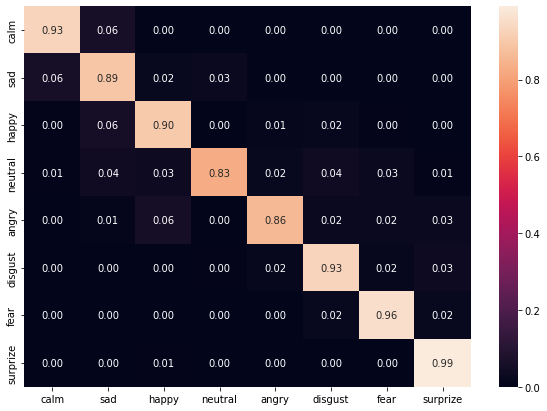

In [54]:
df_cm = pd.DataFrame(confusion_matrix(yhat, actual, normalize='true'), index = ["calm", "sad", "happy", "neutral", "angry", "disgust", "fear", "surprize"], columns = ["calm", "sad", "happy", "neutral", "angry", "disgust", "fear", "surprize"])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True, fmt='.2f')

# Plotting the Performance metrices

## Accuracy Graph

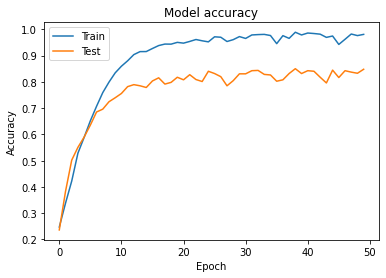

In [48]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

## Loss Graph

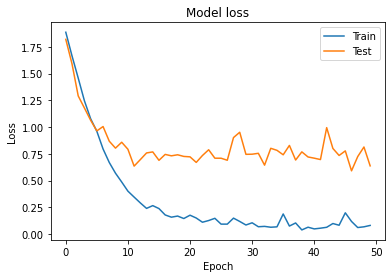

In [49]:
plt.plot(history.history['loss']) 
plt.plot(history.history['val_loss']) 
plt.title('Model loss') 
plt.ylabel('Loss') 
plt.xlabel('Epoch') 
plt.legend(['Train', 'Test'], loc='upper right') 
plt.show()